In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2
import warnings
warnings.filterwarnings("ignore")

/Users/costi/opt/anaconda3/envs/bioinformatics_r/lib/python3.10/site-packages/rpy2/robjects/lib/ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.1
  warnings.warn(


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In [4]:
seq_data = %R seq.data
print(type(seq_data))  # pandas dataframe!

<class 'pandas.core.frame.DataFrame'>


In [5]:
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x: x.upper())

In [7]:
#DataFrame back into the R namespace
%R -i seq_data #-i argument informs the magic system that the variable that follows on the Python space is to be copied into the R namespace.
%R print(colnames(seq_data)) #seq_data, instead of seq.data

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


'FASTQ_FI...,'MD5','RUN_ID',...,'READ_COU...,'BASE_COU...,'ANALYSIS...


In [9]:
%%R
seq_data <- seq_data[seq_data$WITHDRAWN==0, ]
seq_data$POPULATION <- as.factor(seq_data$POPULATION)

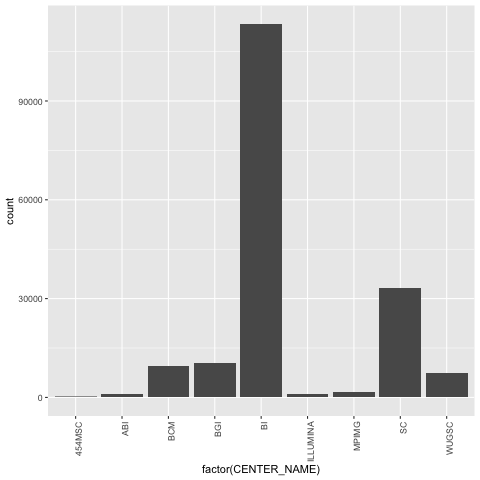

In [10]:
%%R
bar <- ggplot(seq_data) +  aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

In [11]:
%%R 
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

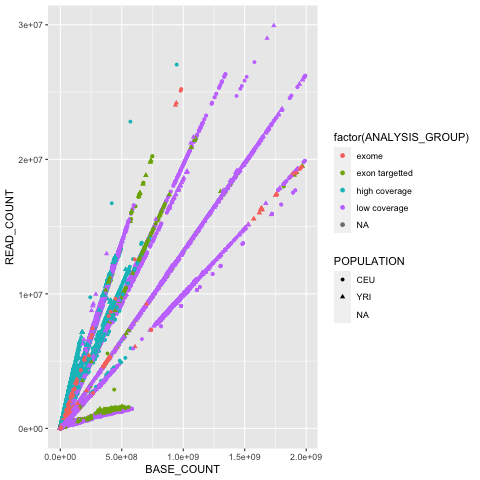

In [12]:
%%R
scatter <- ggplot(yri_ceu, aes(x=BASE_COUNT, y=READ_COUNT, col=factor(ANALYSIS_GROUP), shape=POPULATION)) + geom_point()

print(scatter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


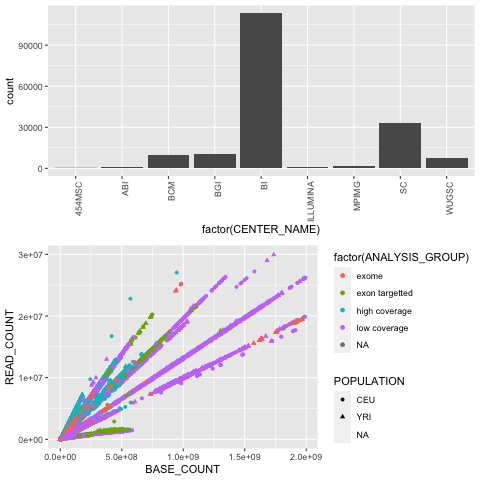

In [14]:
%%R
library(gridExtra)
library(grid)
g <- grid.arrange(bar, scatter, ncol=1)
g